In [1]:
import spacy
import pandas as pd
from spacy import displacy
import matplotlib.pyplot as plt
#from spacy.pipeline import EntityRuler

In [26]:
NER = spacy.load("en_core_web_sm")
ruler = NER.add_pipe("entity_ruler", before='ner')

entities = ['rebels', 'rebel', 'Rebel', 'Rebels', 'dinka', 'Dinka', 'army', 'Army', 'Janjaweed', 'janjaweed', 'Messeriya', 'messeriya','peacekeepers', 
            'Peacekeepers', 'Darfurian traders', 'UNMISS', 'Government of the Republic of South Sudan', 'Darfuris','SSLM', 'SPLM', 'Machar', "Sudan People's Liberation Movement", 'SPLA']
locations = ['Juba', 'Bentiu', 'Unity State', 'Mayom', 'Bor', 'Jonglei', 'Malakal','Wau']

for i in entities:
        ruler.add_patterns([{"label": "ORG", "pattern": i}])
for l in locations:
        ruler.add_patterns([{"label": "GPE", "pattern": l}])

NER.pipeline

c:\Users\pthie\anaconda3\Lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.6.0) was trained with spaCy v3.6.0 and may not be 100% compatible with the current version (3.7.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x19ffb042b10>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x19ffaffbc50>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x19ff478a0a0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x19ffb163850>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x19ffb163bd0>),
 ('entity_ruler', <spacy.pipeline.entityruler.EntityRuler at 0x19ffb011210>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x19ffa677ae0>)]

In [27]:
df = pd.read_csv('data/articles_topics_conflict_cleaned.csv', parse_dates=['date'])

# use for Article Assignment investigation

In [28]:
index = 3


tex = df['summary'][index]

display(df.iloc[index,:][['chat_GPT_location', 'cd_district_name']])

text1 = NER(tex)

orgs_dict = {}
1
for word in text1.ents:
    if word.label_ == 'ORG':
        org_name = word.text
        if org_name in orgs_dict:
            orgs_dict[org_name] += 1
        else:
            orgs_dict[org_name] = 1

# Display the organizations and their respective counts
print(f"Organizations mentioned in the article:\n")
for org, count in orgs_dict.items():
    print(f"{org}: {count}")

displacy.render(text1,style="ent",jupyter=True)

chat_GPT_location    Koch county
cd_district_name            Koch
Name: 3, dtype: object

Organizations mentioned in the article:

rebel: 3
Pakur: 1
army: 1
the Sudan People's Liberation: 1
Army: 1
SPLA: 5
Unity: 1


# FInding Articles explicitly mention Liberation Movement

In [82]:
looking_for = ['SPLM', 'SSLM', "Sudan People's Liberation Movement"]

articles_found = []

for index, content in df.iterrows():
    text1 = NER(content['summary'])
    for word in text1.ents:
        if word.label_ == 'ORG':
            org_name = word.text
            if org_name in looking_for:
                articles_found.append(index)
                break

print(f'total number of articles with matches: {len(articles_found)}')
print(f'Index of articles with matches: {articles_found}')

total number of articles with matches: 40
Index of articles with matches: [16, 21, 22, 71, 86, 93, 99, 108, 128, 132, 137, 152, 158, 170, 190, 199, 203, 220, 226, 244, 261, 276, 277, 280, 292, 295, 315, 318, 341, 342, 344, 345, 346, 347, 358, 363, 370, 376, 379, 457]


In [23]:
df = pd.read_csv('data/article_handlabeled_v2_raw.csv')
df2 = pd.read_csv('data/articles_topics_conflict_cleaned.csv', parse_dates=['date'])

merged_df = df2.merge(df, left_index=True, right_on='Article index')
merged_df = merged_df.drop(['Article index', 'Location correct'], axis=1).rename({'keep location':'County level','hunger':'hunger_bert','refugees':'refugees_bert','humanitarian':'humanitarian_bert','conflict':'conflict_bert' }, axis=1)
merged_df

,summary,date,chat_GPT_location,lat,lng,article_id,cd_district_name,hunger_bert,refugees_bert,humanitarian_bert,conflict_bert,Conflict,County level,Unity level,South Sudan / Liberation movement Conflict,Additional Notes
0,The article discusses the readiness of Guit co...,2011-07-07,Bentiu,9.231487,29.800503,88,Rubkona,False,False,False,True,0,no,no,no,This article is about a celebration of South S...
1,The article discusses the celebration of South...,2011-07-09,Bentiu,9.231487,29.800503,103,Rubkona,False,False,False,True,0,no,no,no,This article is about a celebration of South S...
2,The article discusses the congratulatory messa...,2011-07-11,Bentiu,9.231487,29.800503,221,Rubkona,False,False,False,True,0,no,no,no,Head of Kenyan Community congratulates South S...
3,The article discusses the killing of rebel lea...,2011-07-23,Koch county,8.684727,29.881520,299,Koch,True,True,True,True,2,yes,no,yes,"Rebel leader Gatluak killed in Koch county, be..."
4,The article discusses the killing of South Sud...,2011-07-23,Unity state,8.927721,29.788925,327,Koch,True,True,True,True,2,yes,no,yes,"Rebel leader Gatluak killed in Koch county, be..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,The article discusses how the UK government ha...,2022-12-09,Koch County,8.684727,29.881520,18396,Koch,True,True,True,True,0,no,no,no,UK imposed sanctions on two county commissione...
455,The article discusses how the humanitarian pri...,2022-08-22,Unity State,8.927721,29.788925,18398,Koch,True,True,True,True,0,no,no,yes,Aid is frequently manipulated by political elites
456,The article discusses the intensification of a...,2022-09-26,Unity State,8.927721,29.788925,18427,Koch,False,False,False,True,2,no,yes,yes,Fighting between civilians
457,The article discusses a UN report documenting ...,2022-09-06,Unity state,8.927721,29.788925,18439,Koch,True,True,True,True,1,no,yes,yes,Widespread human rights violations


# Adding hand labeled info back into dataset

In [10]:
df = pd.read_csv('data/handlabeled_articles_results.csv')
df2 = pd.read_csv('data/articles_topics_conflict_cleaned.csv', parse_dates=['date'])
merged_df = df2.merge(df, left_index=True, right_on='Article index')
merged_df = merged_df.drop(['Article index', 'Location correct'], axis=1).rename({'keep location':'County level','hunger':'hunger_bert','refugees':'refugees_bert','humanitarian':'humanitarian_bert','conflict':'conflict_bert' }, axis=1)
merged_df = merged_df[(merged_df['County level'] == 'yes') | (merged_df['Unity level'] == 'yes')] # gets rid of any mislocated articles


merged_df['location_final'] = merged_df.apply(lambda row: row['cd_district_name'] if row['County level']=='yes' else 'Unity state', axis=1)

merged_df['location_final'].unique()


merged_df.to_csv('data/articles_handlabeled_v2_cleaned.csv', index=False)




In [9]:
# Count the occurrences of each unique value in 'location_final'
location_counts = merged_df['location_final'].value_counts()

display(location_counts)

violence_counts = merged_df['Conflict'].value_counts()

display(violence_counts)

conflict_df = merged_df[merged_df['Conflict'] > 0]

location_counts = conflict_df['location_final'].value_counts()

display(location_counts)

violence_counts = conflict_df['Conflict'].value_counts()

display(violence_counts)

mov_SS_counts = conflict_df['South Sudan / Liberation movement Conflict'].value_counts()

display(mov_SS_counts)

Rubkona        156
Unity state    131
Koch            18
Name: location_final, dtype: int64

2    174
1    115
0     16
Name: Conflict, dtype: int64

Rubkona        154
Unity state    117
Koch            18
Name: location_final, dtype: int64

2    174
1    115
Name: Conflict, dtype: int64

yes    195
no      94
Name: South Sudan / Liberation movement Conflict, dtype: int64

In [41]:
merged_df.to_csv('data/articles_raw_with_handlabels.csv', index=False)

# Exploring hand labeled data

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/articles_handlabeled_v2_cleaned.csv', parse_dates=['date'])
df_conflict = df[df['Conflict'] > 0]

df_conflict['date'] = df_conflict['date'].dt.to_period('M').dt.to_timestamp() # change to monthly date

# Group by 'date' and 'Conflict' rating and count the number of articles
grouped = df_conflict.groupby(['date', 'Conflict']).size().reset_index(name='Count')

# Pivot the table to have ratings as columns
pivot_table = grouped.pivot(index='date', columns='Conflict', values='Count').fillna(0)

# Reset index to have 'date' as a regular column
pivot_table.reset_index(inplace=True)

# Rename the columns
pivot_table = pivot_table.rename({1:'conflict_1#', 2:'conflict_2#'}, axis=1)
pivot_table['total_conflict#'] = pivot_table['conflict_1#'] + pivot_table['conflict_2#']

C:\Users\pthie\AppData\Local\Temp\ipykernel_33308\273839473.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_conflict['date'] = df_conflict['date'].dt.to_period('M').dt.to_timestamp() # change to monthly date


In [3]:
ipc_scores_df = pd.read_csv('data/food_crises_cleaned.csv', parse_dates=['date'])
# ipc_scores_df.dropna(subset=['ipc'], inplace=True)

ipc_scores_df = ipc_scores_df[ipc_scores_df.district == 'Rubkona']

min(ipc_scores_df['date'])

Timestamp('2007-01-01 00:00:00')

In [8]:
# Generate a date range from '2012-01-01' to '2020-04-01' with a frequency of 1 month
date_range = pd.date_range(start='2007-01-01', end='2020-02-01', freq='MS')
# Create a DataFrame with a single column 'Date'
df_dates = pd.DataFrame({'Date': date_range})


# Display the DataFrame
df_dates = df_dates.merge(ipc_scores_df, left_on='Date', right_on='date', how='left')
df_dates = df_dates.merge(pivot_table, left_on='Date', right_on='date', how='left')

df_dates = df_dates.drop(['date_x', 'date_y'], axis =1)
# Fill NaN values with zeros
#df_dates['ipc'].fillna(0, inplace=True)
df_dates['total_conflict#'].fillna(0, inplace=True)
df_dates['conflict_2#'].fillna(0, inplace=True)
df_dates['conflict_1#'].fillna(0, inplace=True)
df_dates

,Date,country,district_code,district,centx,centy,year_month,year,month,ipc,...,sum_fatalities,food_price_idx,area,cropland_pct,pop,ruggedness_mean,pasture_pct,conflict_1#,conflict_2#,total_conflict#
0,2007-01-01,South Sudan,143,Rubkona,29.63566,9.268476,2007_01,2007,1,NaN,...,0,0.586252,3578.829,21.51323,107390.8,5674.409,88.27273,0.0,0.0,0.0
1,2007-02-01,South Sudan,143,Rubkona,29.63566,9.268476,2007_02,2007,2,NaN,...,0,0.577403,3578.829,21.51323,107390.8,5674.409,88.27273,0.0,0.0,0.0
2,2007-03-01,South Sudan,143,Rubkona,29.63566,9.268476,2007_03,2007,3,NaN,...,0,0.570951,3578.829,21.51323,107390.8,5674.409,88.27273,0.0,0.0,0.0
3,2007-04-01,South Sudan,143,Rubkona,29.63566,9.268476,2007_04,2007,4,NaN,...,0,0.593205,3578.829,21.51323,107390.8,5674.409,88.27273,0.0,0.0,0.0
4,2007-05-01,South Sudan,143,Rubkona,29.63566,9.268476,2007_05,2007,5,NaN,...,0,0.609532,3578.829,21.51323,107390.8,5674.409,88.27273,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2019-10-01,South Sudan,143,Rubkona,29.63566,9.268476,2019_10,2019,10,3.0,...,0,73.311500,3578.829,21.51323,136305.0,5674.409,88.27273,0.0,0.0,0.0
154,2019-11-01,South Sudan,143,Rubkona,29.63566,9.268476,2019_11,2019,11,NaN,...,2,77.427860,3578.829,21.51323,136305.0,5674.409,88.27273,0.0,0.0,0.0
155,2019-12-01,South Sudan,143,Rubkona,29.63566,9.268476,2019_12,2019,12,NaN,...,0,81.231200,3578.829,21.51323,136305.0,5674.409,88.27273,0.0,0.0,0.0
156,2020-01-01,South Sudan,143,Rubkona,29.63566,9.268476,2020_01,2020,1,NaN,...,0,76.248710,3578.829,21.51323,139635.7,5674.409,88.27273,0.0,0.0,0.0


In [9]:
df_dates.to_csv('data/merged_df_for_causality.csv', index = False)

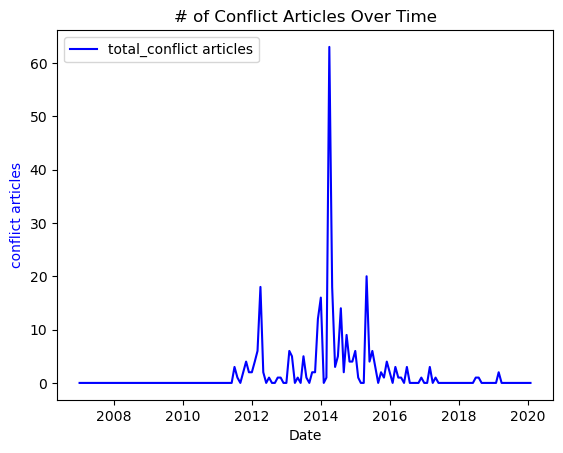

In [5]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot IPC data on the axis
ax.plot(df_dates['Date'], df_dates['total_conflict#'], color='b', label='total_conflict articles')
ax.set_xlabel('Date')
ax.set_ylabel('conflict articles', color='b')

# Customize the plot as needed
ax.set_title('# of Conflict Articles Over Time')
ax.legend(loc='upper left')

# Show the plot
plt.show()

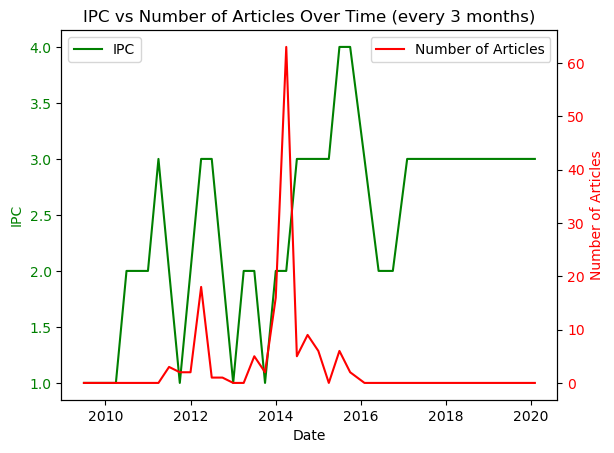

In [6]:
# Filter IPC data to include only values above 0
df_filtered = df_dates[df_dates['ipc'] > 0]

# Create a figure and axes
fig, ax1 = plt.subplots()

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot IPC data on the first axis (left y-axis)
ax1.plot(df_filtered['Date'], df_filtered['ipc'], color='g', label='IPC')
ax1.set_xlabel('Date')
ax1.set_ylabel('IPC', color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Plot Number of Articles data on the second axis (right y-axis)
ax2.plot(df_filtered['Date'], df_filtered['total_conflict#'], color='r', label='Number of Articles')
ax2.set_ylabel('Number of Articles', color='r')
ax2.tick_params(axis='y', labelcolor='r')

ax1.set_title('IPC vs Number of Articles Over Time (every 3 months)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

## example for NER

In [26]:
orgs_dict = {}

for word in text1.ents:
    if word.label_ == 'ORG':
        org_name = word.text
        if org_name in orgs_dict:
            orgs_dict[org_name] += 1
        else:
            orgs_dict[org_name] = 1

# Display the organizations and their respective counts
print(f"Organizations mentioned in the article:\n")
for org, count in orgs_dict.items():
    print(f"{org}: {count}")


Organizations mentioned in the article:

the South Sudan Human Rights Society: 1
SSHURSA: 2
the South Sudan National Legislative Assembly: 1
Justice: 1


In [28]:
orgs = set()

for word in text1.ents:
    if word.label_ == 'ORG':
        orgs.add(word.text)

display(f'Orgs mentioned in article: {orgs}')

"Orgs mentioned in article: {'Justice', 'SSHURSA', 'the South Sudan Human Rights Society', 'the South Sudan National Legislative Assembly'}"

In [183]:
# source: https://www.analyticsvidhya.com/blog/2021/06/nlp-application-named-entity-recognition-ner-in-python-with-spacy/
display(spacy.explain("ORG"))
display(spacy.explain("GPE"))
display(spacy.explain("LOC"))
displacy.render(text1,style="ent",jupyter=True)

'Companies, agencies, institutions, etc.'

'Countries, cities, states'

'Non-GPE locations, mountain ranges, bodies of water'